In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
# test 1
nu_1 = [5,9,13,17,21,25]  # Khz
u4_1 = [3.02,3,3.01,3,3.01,3]  # v
E02_1 = [2.8*5,5*5,7.2*5,5*10,6.4*10,7.8*10]  # mv

# test 2
u4_2 = 3  # v
nu_2 = 15  # Khz
d_2 = np.arange(0,110,10)
E02_2 = np.array([4.4,6.8,8,8.4,8.6,8.6,8.6,8.4,8,7,4.6]) * 10  #mv
E01_2 = np.array([4.4,7,8.2,8.6,8.8,8.8,8.8,8.6,8,7,4.6]) * 10  #mv

# test 3
nu_3 = 15  # Khz
R_3 = 10  # MOm
u4_3 = [0.66,1,1.5,2,2.5,3,3.55,4.1,4.52,5.04]
E02_3 = [2*10, 3*10, 4.4*10, 5.8*10, 7.4*10, 8.8*10, 5.2*20, 6*20, 6.6*20, 7.4*20]

# test 4
nu_4 = [5,9,13,17,21,25]
E02_4 = [2.8*10,5*10,7.4*10,5*20,6.4*20,8*20]  #mv

delt_E = 0.1
delt_R = 0.01*R_3
delt_U = 0.1

In [113]:
def M(E, R, f, U4):
    return E*R/(2*np.pi*f*U4*(2**0.5))

def delt_M(M,E,R,f,U4):
    return M*np.sqrt(0.01**2 + 0.05**2 + (delt_E/E)**2)

M21_avg:  1.08900360537
Variance/Val:  0.0487101016703


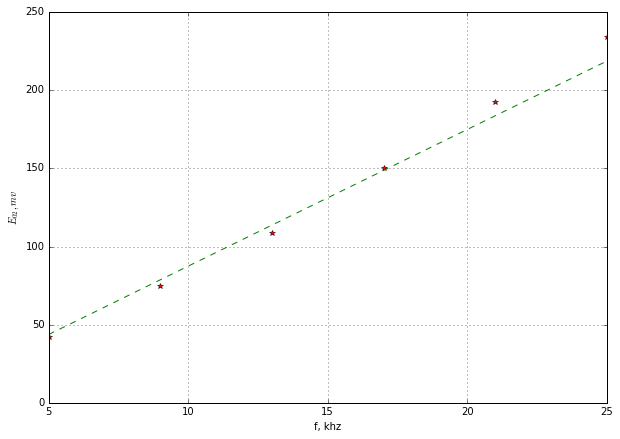

In [114]:
# test 1
plt.figure(figsize=(10,7))
plt.plot(nu_1, np.array(E02_1)*np.array(u4_1),'r*')
M21 = [M(E02_1[i], R_3, nu_1[i], u4_1[i]) for i in range(6)]
avg = np.mean( np.array(E02_1)*np.array(u4_1)/nu_1)
plt.plot(nu_1,np.array(nu_1)*avg, 'g--')
plt.grid(True)
plt.xlabel('f, khz')
plt.ylabel(r'$E_{02} , mv$')
print('M21_avg: ', np.mean(M21))
print('Variance/Val: ', np.std( np.array(E02_1)*np.array(u4_1)/nu_1)/np.min( np.array(E02_1)*np.array(u4_1)/nu_1))

avg error:  0.0865253199437


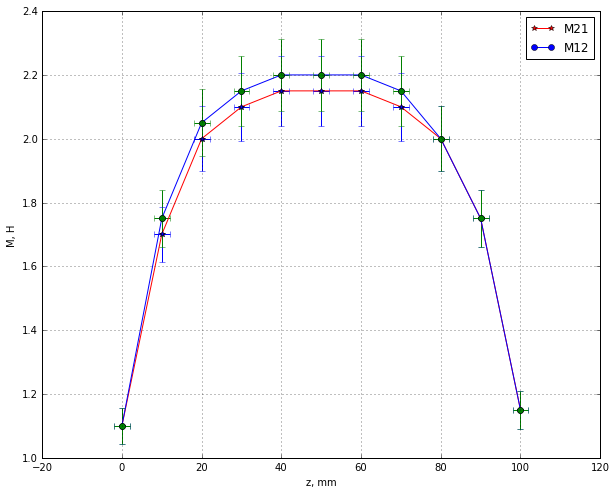

In [117]:
# test 2
M21 = [M(E02_2[i], R_3, nu_2, u4_2) for i in range(11)]
M12 = [M(E01_2[i], R_3, nu_2, u4_2) for i in range(11)]
delta_M21 = [delt_M(M21[i], E02_2[i], R_3, nu_2, u4_2) for i in range(11)]
delta_M12 = [delt_M(M12[i], E01_2[i], R_3, nu_2, u4_2) for i in range(11)]
plt.figure(figsize=(10,8))
plt.plot(d_2, M21, 'r-*',label='M21')
plt.plot(d_2, M12, 'b-o',label='M12')
plt.errorbar(d_2,M21, xerr=np.ones(len(d_2))*2, yerr=delta_M21,fmt='*')
plt.errorbar(d_2,M12, xerr=np.ones(len(d_2))*2, yerr=delta_M12,fmt='o')
plt.xlabel('z, mm')
plt.ylabel('M, H')
plt.grid(True)
plt.legend()
print('avg error: ', np.mean([np.mean(delta_M12),np.mean(delta_M21)])/np.min(M21))

Variance/Val:  0.0254203787239
Avg M:  2.21104470221


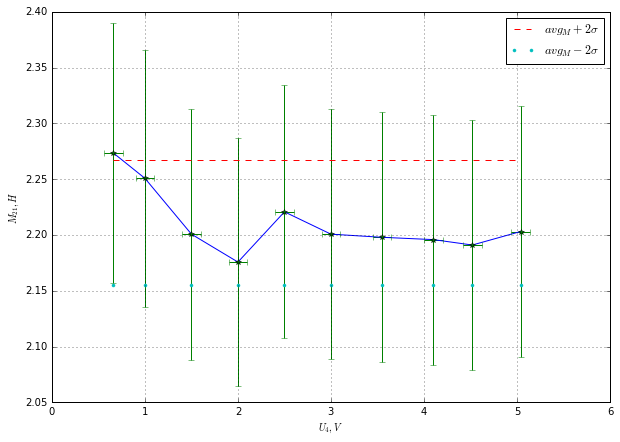

In [116]:
# test 3
M21 = np.array([M(E02_3[i], R_3, nu_3, u4_3[i]) for i in range(10)])
delta_M21 = [delt_M(M21[i], E02_3[i], R_3, nu_2, u4_3[i]) for i in range(10)]
plt.figure(figsize=(10,7))
plt.plot(u4_3, M21)
plt.grid(True)
sigma = np.std(M21)
plt.errorbar(u4_3,M21, xerr=delt_U, yerr=delta_M21,fmt='*')
plt.plot(u4_3, np.ones(10)*(np.mean(M21) + 2*sigma),'--',label=r'$avg_M + 2\sigma$')
plt.plot(u4_3, np.ones(10)*(np.mean(M21) - 2*sigma),'.',label=r'$avg_M - 2\sigma$')
plt.xlabel(r'$U_4, V$')
plt.ylabel(r'$M_{21} ,H$')
plt.legend()
# plt.ylim([2,2.5])
print('Variance/Val: ',2*sigma/np.mean(M21))
print('Avg M: ', np.mean(M21))

Avg:  2.20236466918
Variance/Val:  0.101736910803


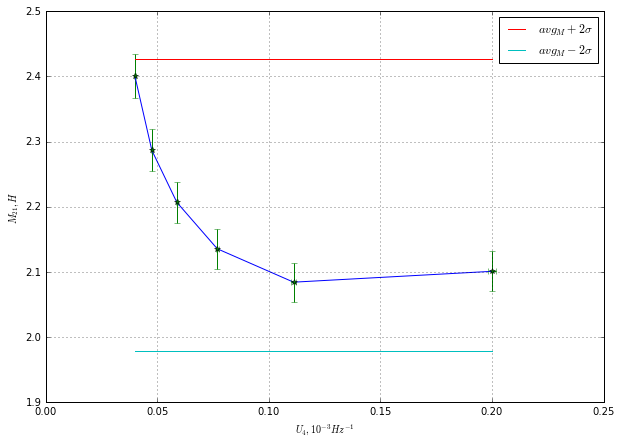

In [111]:
# test 4
M21 = np.array([M(E02_4[i], R_3, nu_4[i], u4_2) for i in range(6)])
delta_M21 = [delt_M(M21[i], E02_4[i], R_3, nu_4[i], u4_2) for i in range(6)]
plt.figure(figsize=(10,7))
plt.plot(1/np.array(nu_4), M21)
sigma = np.std(M21)
plt.errorbar(1/np.array(nu_4),M21, xerr=0.01/np.array(nu_4), yerr=delta_M21,fmt='*')
plt.plot(1/np.array(nu_4), np.ones(6)*(np.mean(M21) + 2*sigma),label=r'$avg_M + 2\sigma$')
plt.plot(1/np.array(nu_4), np.ones(6)*(np.mean(M21) - 2*sigma),label=r'$avg_M - 2\sigma$')
plt.xlabel(r'$U_4, 10^{-3}Hz^{-1}$')
plt.ylabel(r'$M_{21} ,H$')
plt.grid(True)
plt.legend()
print('Avg: ', np.mean(M21))
print('Variance/Val: ',2*sigma/np.mean(M21))